In [1]:
!nvidia-smi

Fri Mar 15 21:09:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install wandb

In [3]:
!pip install ultralytics

In [4]:
!pip install roboflow

In [5]:
from ultralytics import YOLO

In [6]:
import wandb

In [7]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [9]:
!mkdir {HOME}/datasets1

In [10]:
%cd {HOME}/datasets1

/content/datasets1


In [11]:
wandb.login()

wandb: Currently logged in as: ananya856 (ymny). Use `wandb login --relogin` to force relogin


True

In [12]:
wandb.init(project="Pest Detection")

In [13]:
from roboflow import Roboflow
rf = Roboflow(api_key="7BWBc4mGKo4Loa3tIDNp")
project = rf.workspace("demo1-mafsj").project("hack-62ebm")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Hack-1 in yolov8:: 100%|██████████| 4838/4838 [00:00<00:00, 5763.38it/s]


#initial training of model-test

In [20]:
# model1 = YOLO('yolov8n.pt')
# results = model1.train(save_period = 1,data=f"{dataset.location}/data.yaml",batch=32,epochs=20,plots=True)

%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 plots=True batch=32 save_period=1

/content
Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets1/Hack-1/data.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#initial training code
# %cd {HOME}
# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=2 plots=True batch=32 save_period=1

/content
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Barcodes-5/data.yaml, epochs=2, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [22]:
from google.colab import files
files.download('/content/runs/detect/train6/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/datasets/runs/detect/train/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/datasets/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#validate

In [20]:
from ultralytics import YOLO
model = YOLO('/content/datasets/runs/detect/train4/weights/best.pt')

# Validate the model
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011303 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/Hack-1/valid/labels.cache... 986 images, 0 backgrounds, 0 corrupt: 100%|██████████| 986/986 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 72, len(boxes) = 2019. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:13<00:00,  4.70it/s]


                   all        986       2019      0.593      0.284      0.333      0.197
 Alternaria Brown Spot        986         29      0.109      0.069     0.0284    0.00793
                Aphids        986         13          1          0    0.00371    0.00174
         Beet armyworm        986         18      0.507      0.333      0.366      0.254
       Cotton bollworm        986         22      0.645      0.413       0.51      0.345
          Early Blight        986          7          0          0    0.00862    0.00452
         Fall Armyworm        986          2          1          0      0.258      0.205
     Green peach aphid        986         84      0.399      0.619      0.522      0.271
            Locusta sp        986          8      0.295       0.25      0.205     0.0865
                 Plaga        986         99      0.406      0.566      0.449      0.285
         Potato Beetle        986          7      0.708      0.571      0.673      0.318
   Silverleaf whitefl

array([  0.0079288,   0.0017412,      0.2544,     0.34528,   0.0045209,     0.20548,     0.27137,     0.19715,     0.08647,     0.28545,     0.31789,     0.16452,    0.049519,     0.01251,     0.15027,     0.18437,    0.037223,      0.1431,    0.043915,     0.47757,     0.19715,     0.75293,    0.099327,     0.49035,
           0.33305,   0.0036495,     0.24814,     0.31875,    0.033244])

In [23]:
%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011303 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets1/Hack-1/valid/labels.cache... 986 images, 0 backgrounds, 0 corrupt: 100% 986/986 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 72, len(boxes) = 2019. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 62/62 [00:13<00:00,  4.45it/s]
                   all        986       2019      0.593      0.284      0.333      0.197
 Alternaria Brown Spot        986         29      0.109      0.069     0.0284    0.00793
                Aphids        986         13          1          0    0.00371    0.00174
         Beet armyworm        

#Inference

In [26]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train6/weights/best.pt conf=0.25 source=/content/datasets1/Hack-1/test/images save=True

/content
Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011303 parameters, 0 gradients, 8.1 GFLOPs

image 1/222 /content/datasets1/Hack-1/test/images/10_jpeg.rf.ffa14b9ca0598e0db3c851d1d707b4f0.jpg: 640x640 (no detections), 11.3ms
image 2/222 /content/datasets1/Hack-1/test/images/14_jpeg.rf.fcc896a2c643e5e277c00cf30bb95b8d.jpg: 640x640 (no detections), 8.7ms
image 3/222 /content/datasets1/Hack-1/test/images/17_jpeg.rf.b9f7320bece0c3f16d183770d1ea3f69.jpg: 640x640 (no detections), 7.4ms
image 4/222 /content/datasets1/Hack-1/test/images/18_jpeg.rf.0957154743cea182c5d241ab2f4e3efb.jpg: 640x640 2 sitophilus zeamaiss, 7.4ms
image 5/222 /content/datasets1/Hack-1/test/images/19_jpeg.rf.4231448695e6ba3fd79496e942d34404.jpg: 640x640 (no detections), 7.5ms
image 6/222 /content/datasets1/Hack-1/test/images/1_I_49XNbKNzeZgS0dS1qgfA-2-_jpg.rf.567aaea98526c9f23cf2e5c3b67d789e.jpg: 640x640 (no detections), 7.5ms
image 7/222 /

#code to save cropped part

In [27]:
!yolo predict model=/content/runs/detect/train6/weights/best.pt source='/content/datasets1/Hack-1/test/images' save_crop

Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011303 parameters, 0 gradients, 8.1 GFLOPs

image 1/222 /content/datasets1/Hack-1/test/images/10_jpeg.rf.ffa14b9ca0598e0db3c851d1d707b4f0.jpg: 640x640 (no detections), 18.1ms
image 2/222 /content/datasets1/Hack-1/test/images/14_jpeg.rf.fcc896a2c643e5e277c00cf30bb95b8d.jpg: 640x640 (no detections), 7.5ms
image 3/222 /content/datasets1/Hack-1/test/images/17_jpeg.rf.b9f7320bece0c3f16d183770d1ea3f69.jpg: 640x640 (no detections), 7.4ms
image 4/222 /content/datasets1/Hack-1/test/images/18_jpeg.rf.0957154743cea182c5d241ab2f4e3efb.jpg: 640x640 2 sitophilus zeamaiss, 7.4ms
image 5/222 /content/datasets1/Hack-1/test/images/19_jpeg.rf.4231448695e6ba3fd79496e942d34404.jpg: 640x640 (no detections), 7.5ms
image 6/222 /content/datasets1/Hack-1/test/images/1_I_49XNbKNzeZgS0dS1qgfA-2-_jpg.rf.567aaea98526c9f23cf2e5c3b67d789e.jpg: 640x640 (no detections), 7.4ms
image 7/222 /content/d

In [ ]:
barcode_qrcode_detector = YOLO('/content/best.pt')
barcode_qrcode = barcode_qrcode_detector('/content/runs/detect/predict',save_crop=True)


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/15 /content/runs/detect/predict/barcode.jpg: 640x384 2 Barcodes, 269.1ms
image 2/15 /content/runs/detect/predict/barcode2.jpg: 640x480 2 Barcodes, 173.4ms
image 3/15 /content/runs/detect/predict/barcode3.jpg: 640x480 2 Barcodes, 12.2ms
image 4/15 /content/runs/detect/predict/barcode4.jpg: 512x640 1 Barcode, 128.6ms
image 5/15 /content/runs/detect/predict/barcode5.jpg: 192x640 2 Barcodes, 1 QR Code, 112.4ms
image 6/15 /content/runs/detect/predict/barcode6.jpg: 640x512 1 Barcode, 116.1ms
image 7/15 /content/runs/detect/predict/barcode7.jpg: 480x640 1 Barcode, 116.4ms
image 8/15 /content/runs/detect/predict/contrast1.jpg: 448x640 1 Barcode, 170.1ms
image 9/15 /content/runs/detect/predict/images---2022-01-13T190932-102.jpg: 640x640 1 QR Code, 17.4ms
image 10/15 /content/runs/detect/predict/qD9b2_png.jpg: 640x640 1 QR Code, 20.1ms
image 11/15 /content/runs/detect/predict/qrcode.jpg: 640x640 1 QR Code, 19.2ms
image 12/15 /content/runs/detect

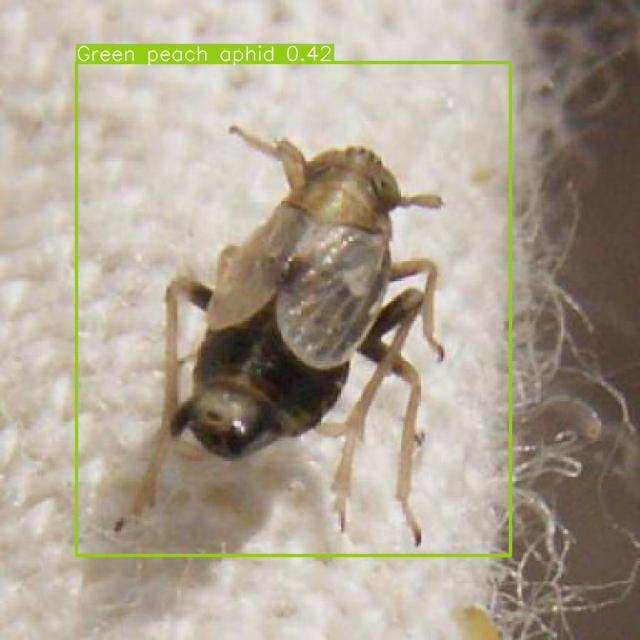

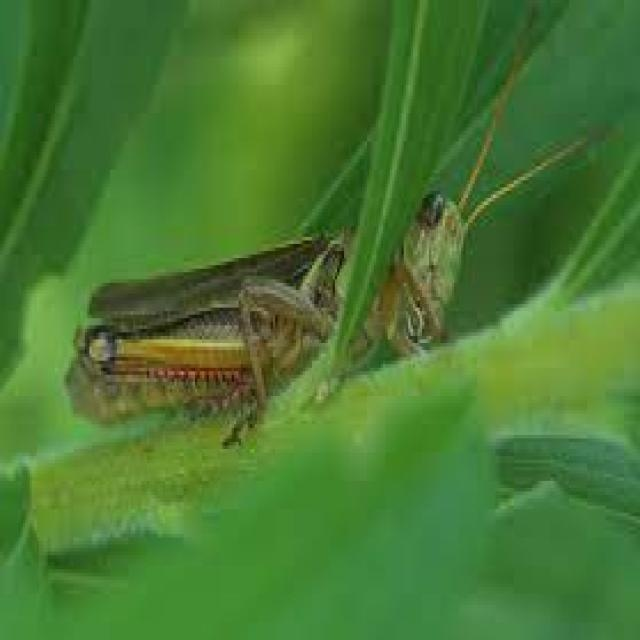

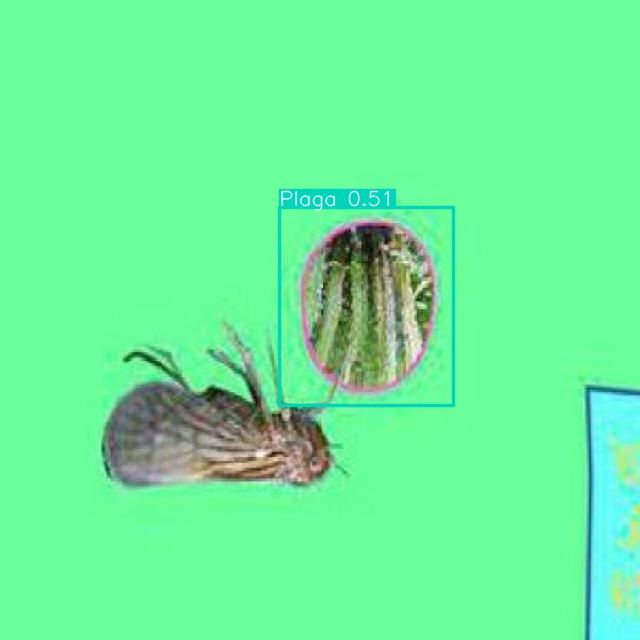

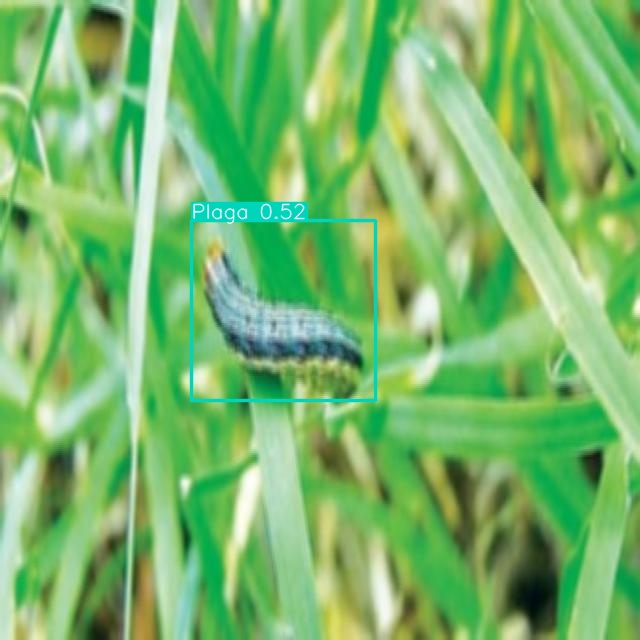

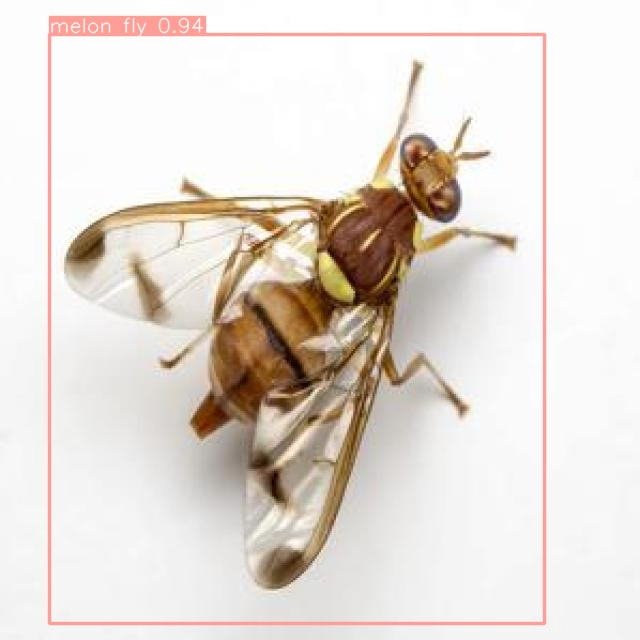

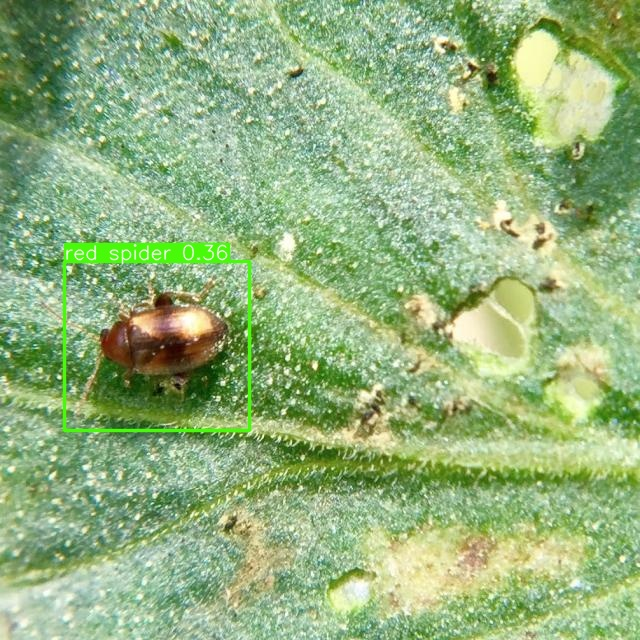

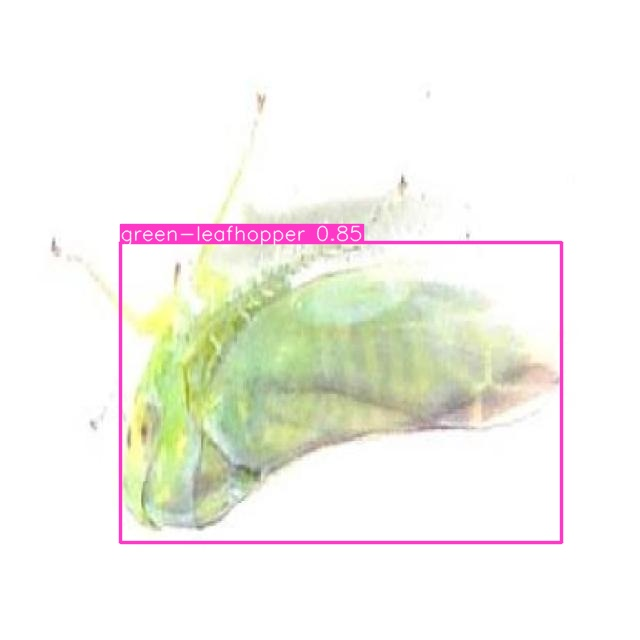

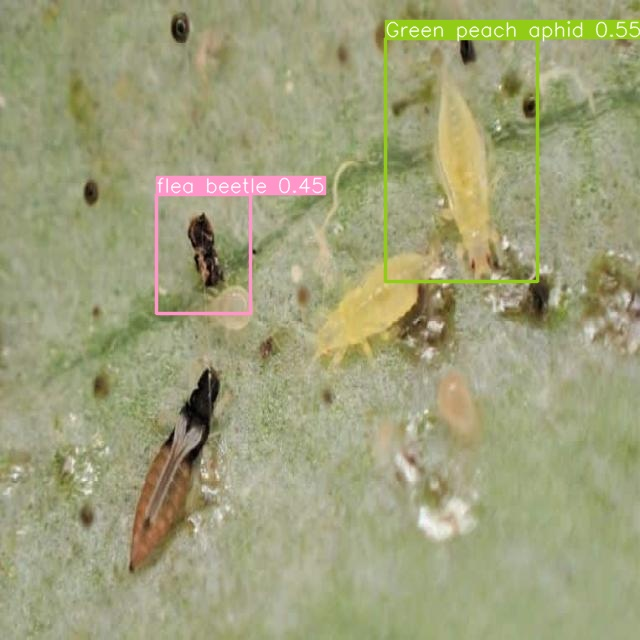

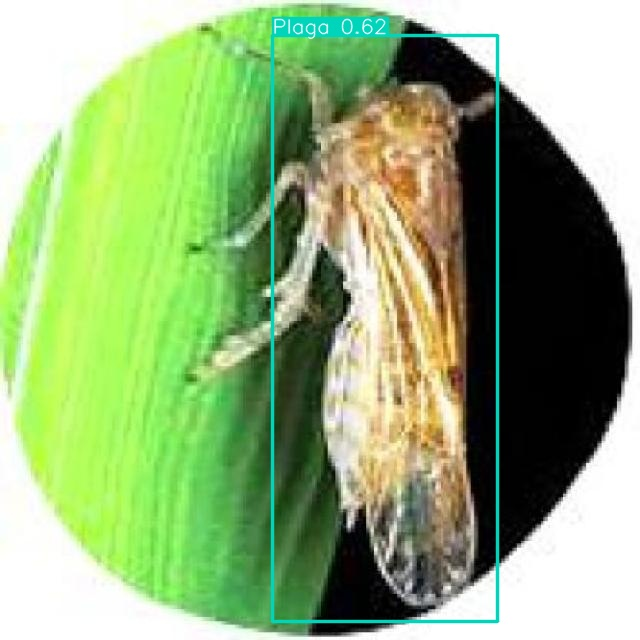

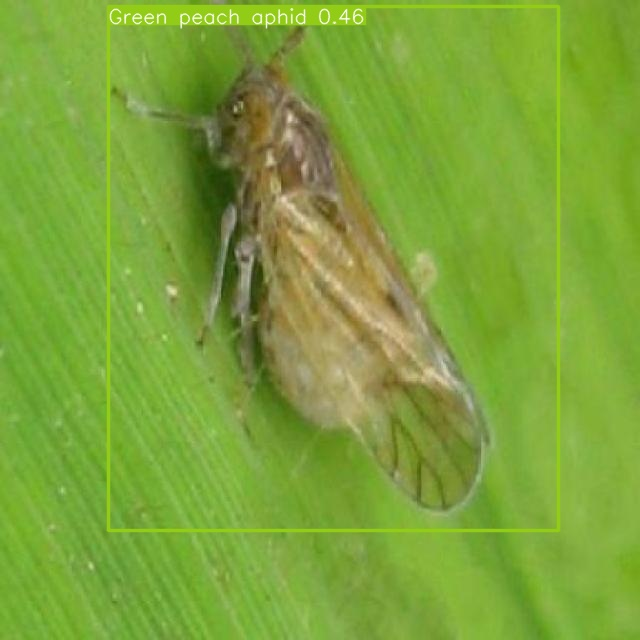

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.[jJpP][pPnN][gG]')[:10]:
      display(Image(filename=image_path, width=500))
      print("\n")

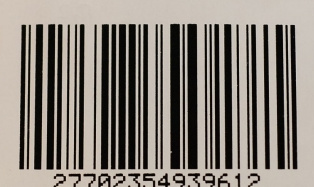

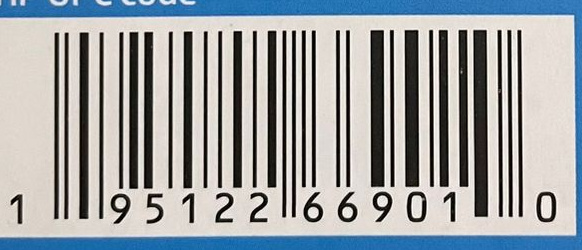

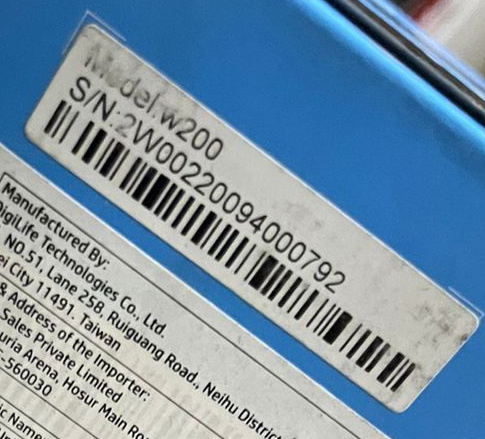

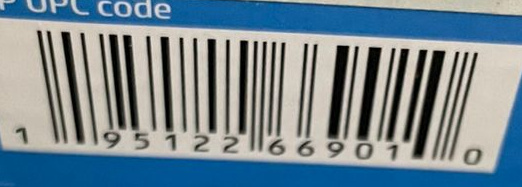

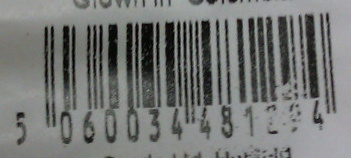

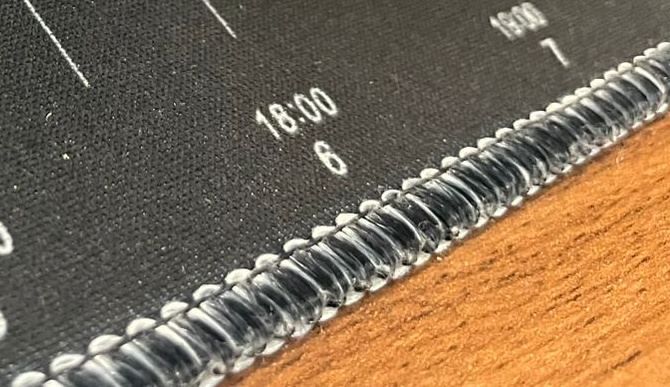

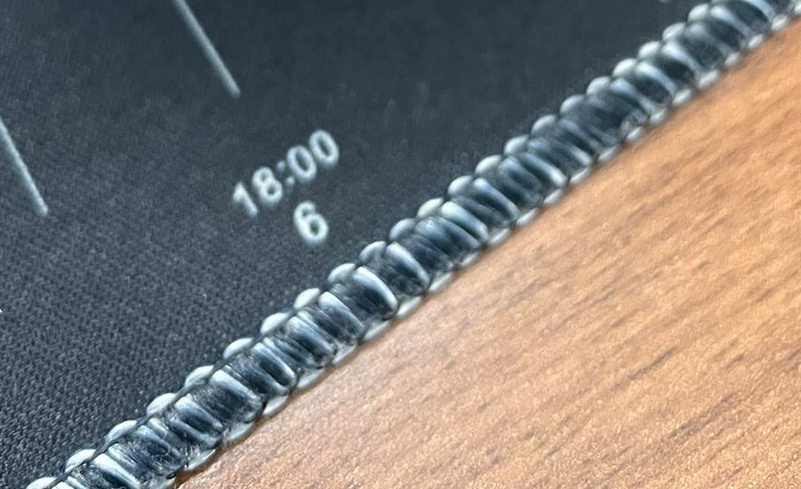

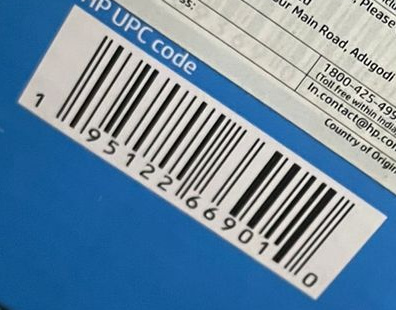

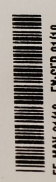

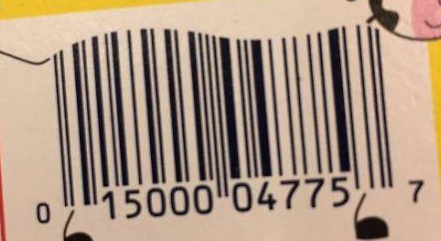

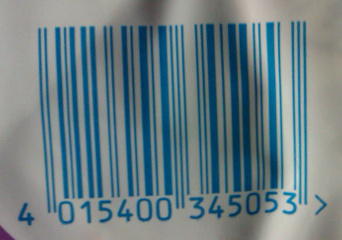

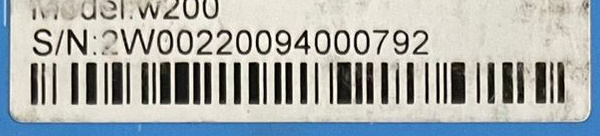

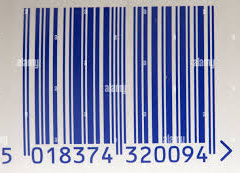

In [ ]:
import glob
from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict2/crops/Barcode/*.[jJpP][pPnN][gG]')[:20]:
      display(Image(filename=image_path, width=300))
      print("\n")

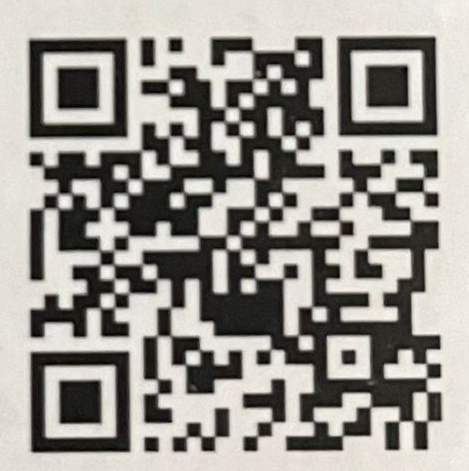

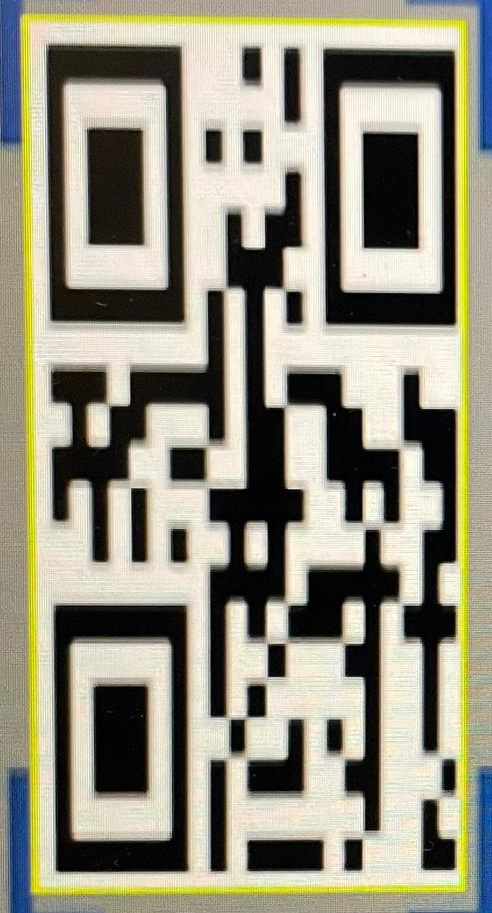

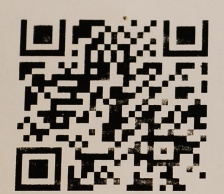

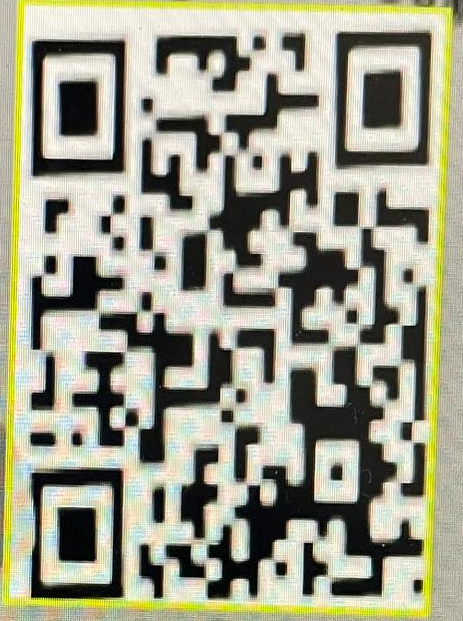

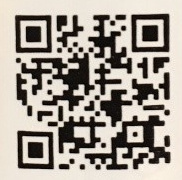

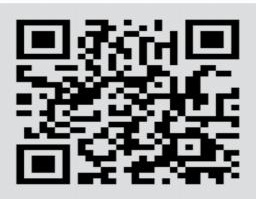

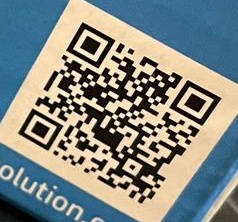

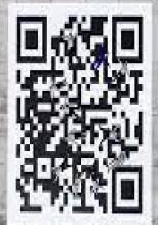

In [ ]:
import glob
from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict2/crops/QR Code/*.[jJpP][pPnN][gG]')[:10]:
      display(Image(filename=image_path, width=300))
      print("\n")

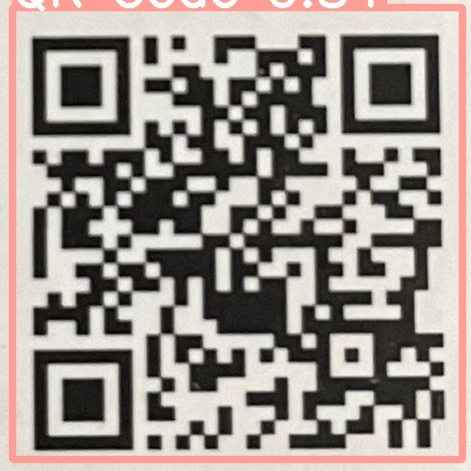

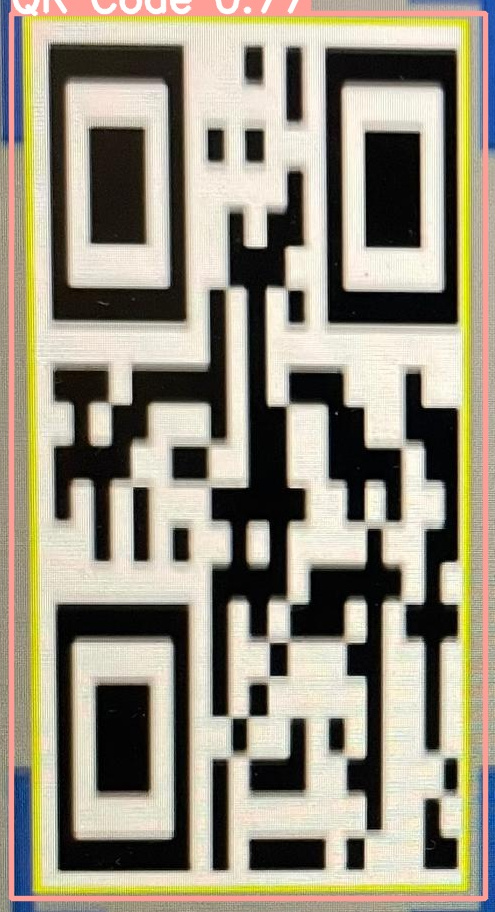

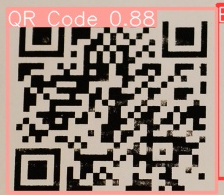

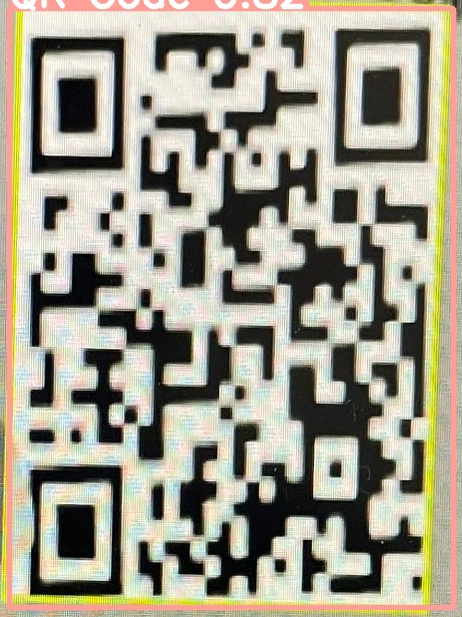

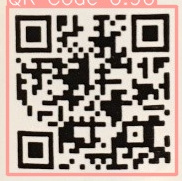

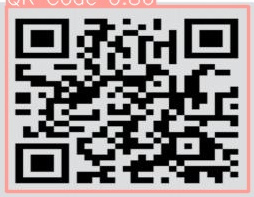

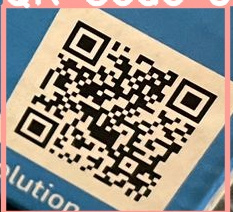

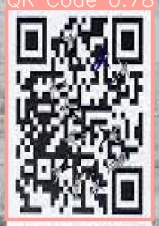

In [ ]:
import glob
from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict3/crops/QR Code/*.[jJpP][pPnN][gG]')[:10]:
      display(Image(filename=image_path, width=300))
      print("\n")

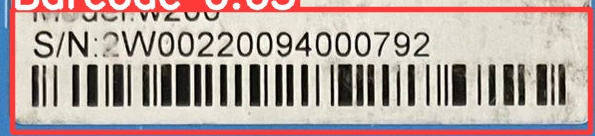

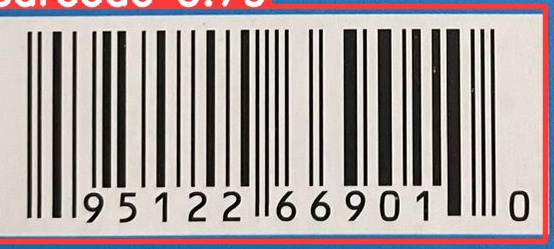

In [ ]:
import glob
from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict3/crops/Barcode/*.[jJpP][pPnN][gG]')[:10]:
      display(Image(filename=image_path, width=300))
      print("\n")

In [ ]:
#to download a folder zip it and download
!zip -r /content/detected_images.zip /content/runs/detect/predict

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/qrcode.jpg (deflated 5%)
  adding: content/runs/detect/predict/qrcode3.jpg (deflated 8%)
  adding: content/runs/detect/predict/barcode5.jpg (deflated 2%)
  adding: content/runs/detect/predict/qrcode2.jpg (deflated 7%)
  adding: content/runs/detect/predict/barcode.jpg (deflated 6%)
  adding: content/runs/detect/predict/barcode7.jpg (deflated 2%)
  adding: content/runs/detect/predict/qrcode5.jpg (deflated 4%)
  adding: content/runs/detect/predict/qD9b2_png.jpg (deflated 15%)
  adding: content/runs/detect/predict/qrcode4.jpg (deflated 4%)
  adding: content/runs/detect/predict/barcode3.jpg (deflated 5%)
  adding: content/runs/detect/predict/barcode6.jpg (deflated 5%)
  adding: content/runs/detect/predict/contrast1.jpg (deflated 3%)
  adding: content/runs/detect/predict/barcode2.jpg (deflated 5%)
  adding: content/runs/detect/predict/images---2022-01-13T190932-102.jpg (deflated 5%)
  adding: content/run

In [ ]:
#to download a folder zip it and download
!zip -r /content/cropped_images5.zip /content/runs/detect/predict2

  adding: content/runs/detect/predict2/ (stored 0%)
  adding: content/runs/detect/predict2/qrcode.jpg (deflated 5%)
  adding: content/runs/detect/predict2/qrcode3.jpg (deflated 8%)
  adding: content/runs/detect/predict2/barcode5.jpg (deflated 2%)
  adding: content/runs/detect/predict2/qrcode2.jpg (deflated 7%)
  adding: content/runs/detect/predict2/crops/ (stored 0%)
  adding: content/runs/detect/predict2/crops/Barcode/ (stored 0%)
  adding: content/runs/detect/predict2/crops/Barcode/barcode5.jpg (deflated 2%)
  adding: content/runs/detect/predict2/crops/Barcode/barcode.jpg (deflated 2%)
  adding: content/runs/detect/predict2/crops/Barcode/barcode32.jpg (deflated 1%)
  adding: content/runs/detect/predict2/crops/Barcode/barcode22.jpg (deflated 1%)
  adding: content/runs/detect/predict2/crops/Barcode/barcode7.jpg (deflated 1%)
  adding: content/runs/detect/predict2/crops/Barcode/qrcode4.jpg (deflated 0%)
  adding: content/runs/detect/predict2/crops/Barcode/barcode23.jpg (deflated 0%)
  a